<a href="https://colab.research.google.com/github/islavathnaveennaik/imbalanced-dataset/blob/main/imbalanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imbalanced datasets


In [1]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('train.csv')
df_train

target_count = df_train.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

# target_count.plot(kind='bar', title='Count (target)');

Class 0: 573518
Class 1: 21694
Proportion of class 0 is  96.36 %


In [2]:
df_train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


#The metric trap


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Remove 'id' and 'target' columns
labels = df_train.columns[2:]
df_train = df_train.dropna()

X = df_train[labels]
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.74%


Now let's run the same code, but using only one feature (which should drastically reduce the accuracy of the classifier):

In [4]:
model = DecisionTreeClassifier()
model.fit(X_train[['ps_ind_04_cat']], y_train)
y_pred = model.predict(X_test[['ps_ind_04_cat']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.31%


#Confusion matrix

Confusion matrix:
 [[114655      0]
 [  4388      0]]


<ipython-input-5-8aeae4f6eca9>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
<ipython-input-5-8aeae4f6eca9>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


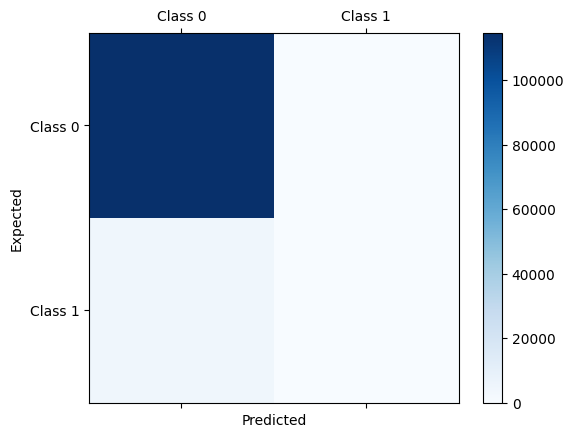

In [5]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


In [6]:
from sklearn.metrics import f1_score
f1_score(y_test, model.predict(X_test[['ps_ind_04_cat']]))

0.0

#Resampling


In [7]:
# Class count
count_class_0, count_class_1 = df_train.target.value_counts()

# Divide by class
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

count_class_0, count_class_1

(573518, 21694)

#Random under-sampling


In [8]:
count_class_1, count_class_0

(21694, 573518)

Random under-sampling:
target
0    21694
1    21694
Name: count, dtype: int64


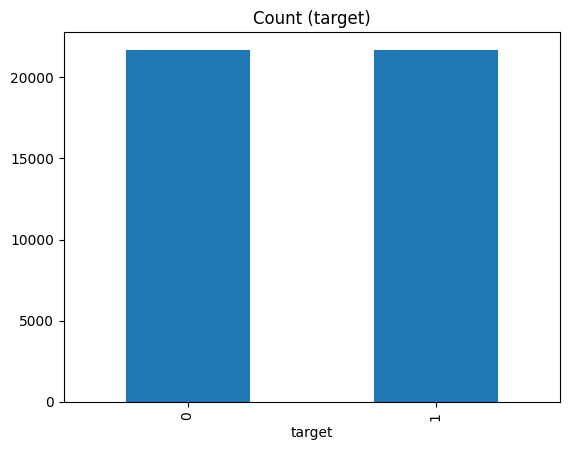

In [9]:
df_class_0_under = df_class_0.sample(count_class_1) #it will randomly sample count_class_1 number of rows from the dataframe
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

#Random over-sampling


Random over-sampling:
target
0    573518
1    573518
Name: count, dtype: int64


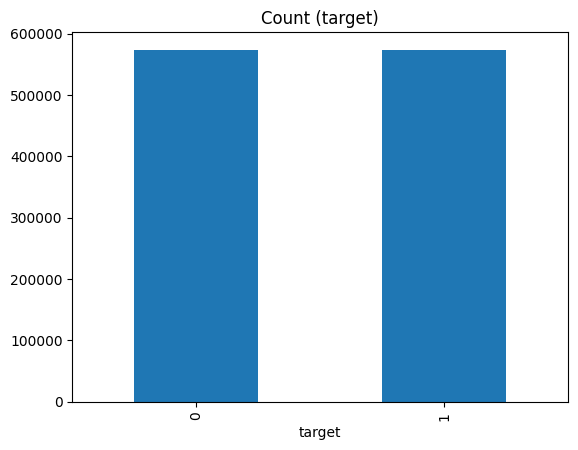

In [10]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

#Python imbalanced-learn module
A number of more sophisticated resapling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Let's apply some of these resampling techniques, using the Python library imbalanced-learn. It is compatible with scikit-learn and is part of scikit-learn-contrib projects

In [11]:
!pip install imblearn

In [12]:
import imblearn

For ease of visualization, let's create a small unbalanced sample dataset using the make_classification method


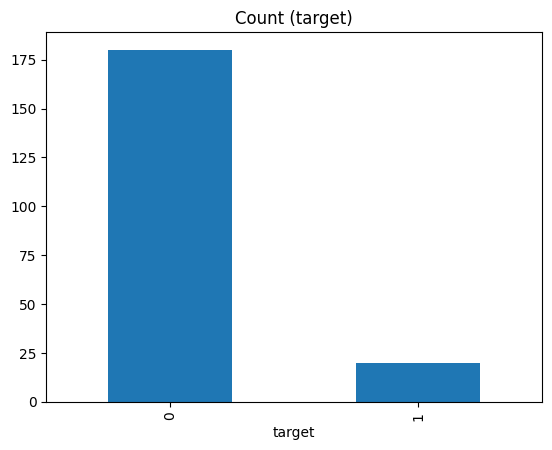

In [13]:
from sklearn.datasets import make_classification #subpackage used for creating own classifcation dataset
import pandas as pd

#generate some fake classification dataset
X, y = make_classification(
    n_classes=2, class_sep=0.75, weights=[0.9, 0.1],
    n_informative=2, n_redundant=0, flip_y=0,
    n_features=2, n_clusters_per_class=2,
    n_samples=200, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df
df.target.value_counts().plot(kind='bar', title='Count (target)');

In [14]:
df

,0,1,target
0,0.157423,-0.374667,0
1,-0.909752,0.037925,0
2,-0.944869,-1.136125,0
3,-0.883279,-1.362500,0
4,-0.022943,1.015924,0
...,...,...,...
195,-0.272900,0.923791,0
196,-0.880549,-0.633844,0
197,-1.186294,0.943099,0
198,-1.158688,-0.399660,0


We will also create a 2-dimensional plot function, plot_2d_space, to see the data distribution

In [15]:
def plot_2d_space(X, y, label='Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

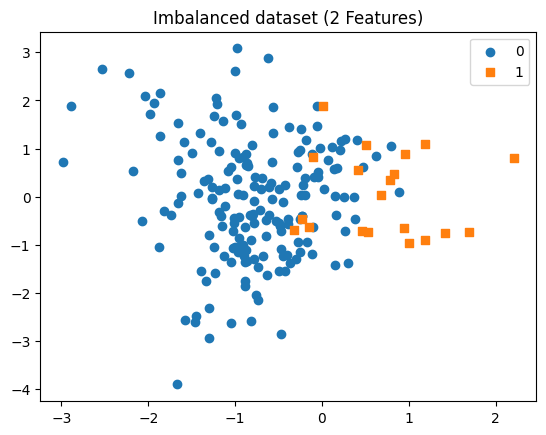

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plot_2d_space(X, y, 'Imbalanced dataset (2 Features)')

#Random under-sampling and over-sampling with imbalanced-learn


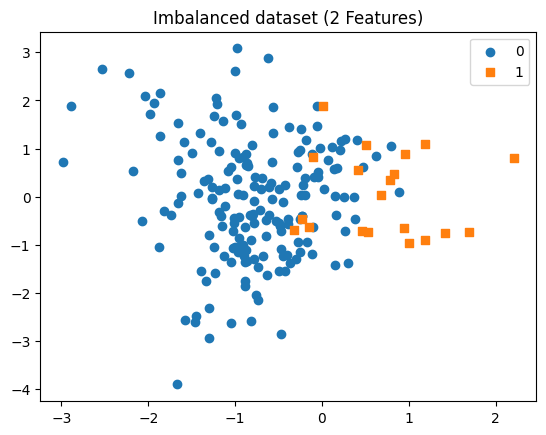

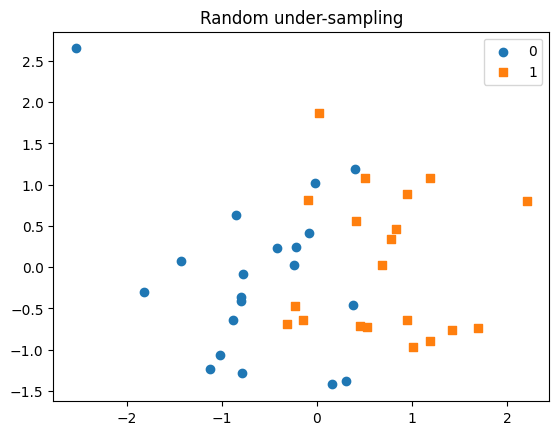

In [17]:
from imblearn.under_sampling import RandomUnderSampler #  import

rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X, y) #resampling the data

#print('Removed indexes:', id_rus)

plot_2d_space(X, y, 'Imbalanced dataset (2 Features)')
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

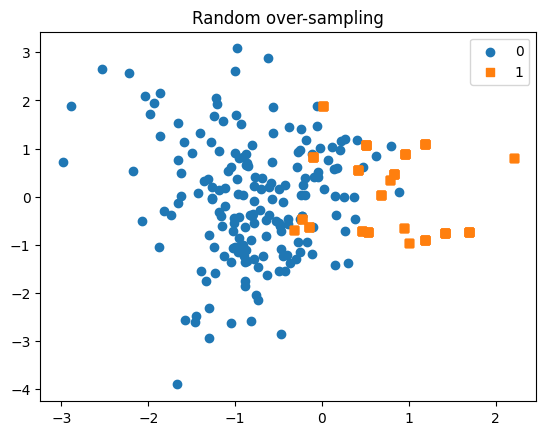

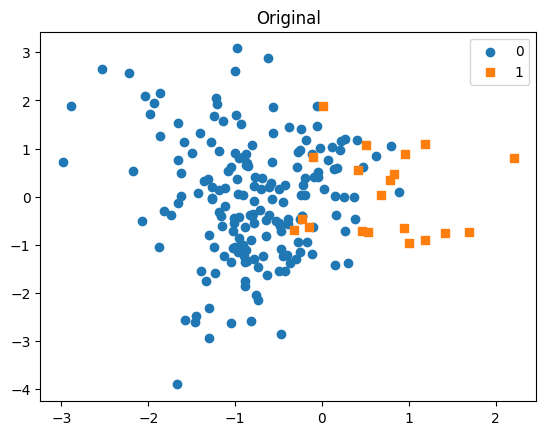

In [18]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler() #Initialis the model
X_ros, y_ros = ros.fit_resample(X, y) #Fit the model

#print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')
plot_2d_space(X, y, 'Original')

In [19]:
y_ros.sum(), y.sum(), y_rus.sum()

(180, 20, 20)

#Under-sampling: Cluster Centroids


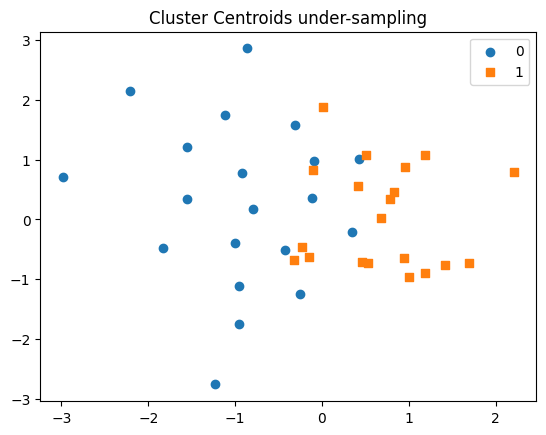

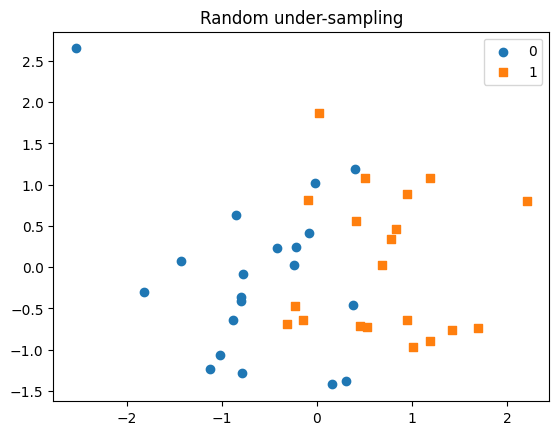

In [20]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 20})
X_cc, y_cc = cc.fit_resample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')
#plot_2d_space(X, y, 'Original')
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [21]:
y_cc.sum()/y_cc.shape[0]
#y_cc

0.5

#Over-sampling: SMOTE
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors

We'll use ratio='minority' to resample the minority class.

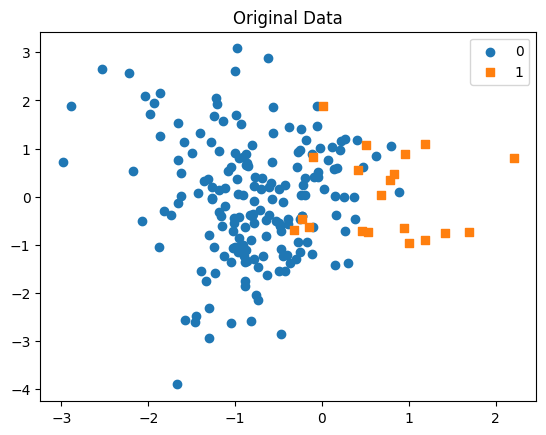

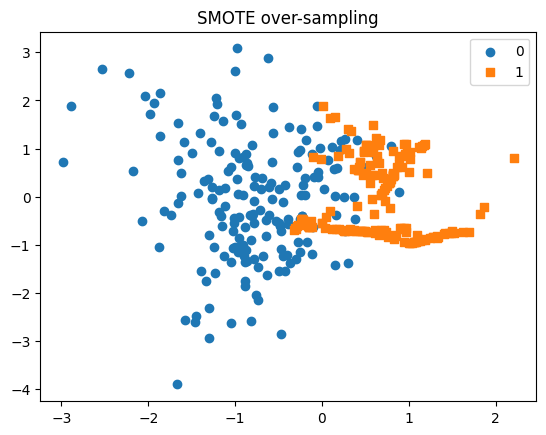

In [22]:
from imblearn.over_sampling import SMOTE

plot_2d_space(X, y, 'Original Data')

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

Over-sampling followed by under-sampling
Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:


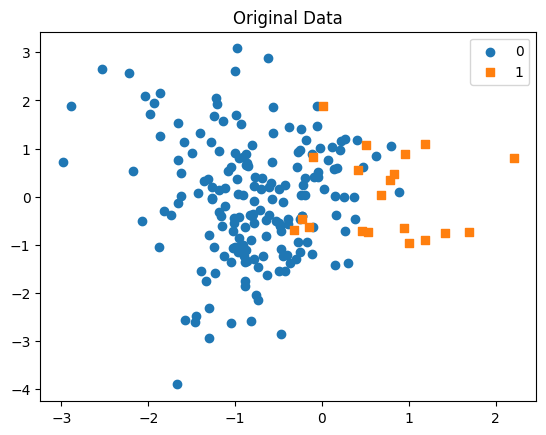

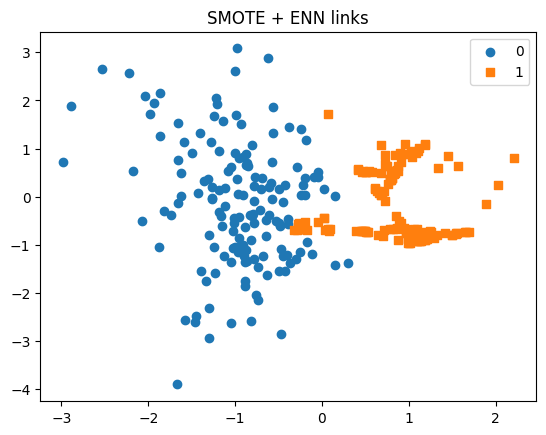

In [23]:
from imblearn.combine import SMOTEENN

plot_2d_space(X, y, 'Original Data')

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + ENN links')

In [24]:
y_smt.shape

(294,)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X,y)


print( "F1-Score on the sampled dataset : ",f1_score(y, lr.predict(X)))

F1-Score on the sampled dataset :  0.5161290322580645


In [26]:
lr.coef_

array([[ 4.27756477, -0.19174654]])

In [27]:
lr.predict([[0.67,0.89]])

array([1])